# Relatório Final: Análise Exploratória de Diamantes
## Projeto de Extensão: Introdução à Ciência de Dados (ICD 2026)

---

### **Autores**
* **Gustavo Kim Alcantara** (RA: 820763)
* **Enzo Dezem Alves** (RA: 801743)

**Data:** Dezembro/2025
**Dataset:** [https://www.kaggle.com/datasets/zahranusrat/diamonds-characteristics-and-pricing-analysis?select=diamonds.csv](https://www.kaggle.com/datasets/zahranusrat/diamonds-characteristics-and-pricing-analysis?select=diamonds.csv)

---


### **1. Introdução e Metodologia**

**1.1 Introdução e Objetivos**
Este relatório apresenta uma Análise Exploratória de Dados (AED) sobre um conjunto de dados contendo atributos físicos e preços de aproximadamente 54.000 diamantes. O objetivo principal é compreender quais características (como peso, qualidade de corte e dimensões) mais influenciam o valor financeiro da joia.

As **Perguntas de Pesquisa** que guiam este estudo são:
1.  **Correlação:** O tamanho do diamante tem relação direta com o preço?
2.  **Qualidade dos Dados:** Existem inconsistências ou outliers que precisam ser tratados?
3.  **Distribuição:** Os preços seguem uma distribuição normal ou assimétrica?
4.  **Influência Técnica:** Variáveis de lapidação (`depth` e `table`) impactam o preço?

**1.2 Metodologia**
Para responder a essas perguntas, o trabalho foi dividido nas seguintes etapas:
* **Coleta e Inspeção:** Carregamento dos dados brutos e verificação de tipos.
* **Limpeza (Cleaning):** Remoção de duplicatas e tratamento de dados fisicamente impossíveis (dimensões zeradas).
* **Transformação (Feature Engineering):** Criação da variável `volume` (baseada em x, y, z) para melhor análise dimensional.
* **Visualização:** Uso de histogramas, boxplots e heatmaps para validar hipóteses.

In [23]:
# Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração estética dos gráficos para o relatório
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = [10, 6]

print("Bibliotecas importadas e ambiente configurado com sucesso.")

Bibliotecas importadas e ambiente configurado com sucesso.


### **2. Carregamento e Inspeção Inicial**
A etapa inicial consiste em carregar os dados brutos e verificar sua estrutura (tipos de dados, presença de valores nulos e estatísticas descritivas preliminares).

In [24]:
# Carregamento do Dataset
try:
    df = pd.read_csv('data/diamonds.csv')
    print("Dataset carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo 'diamonds.csv' não encontrado. Verifique o upload.")

# Exibindo as primeiras linhas para familiarização com as variáveis
display(df.head())

# Verificação de tipos de dados e valores nulos
print("-" * 50)
print("Informações do DataFrame:")
print("-" * 50)
df.info()

Dataset carregado com sucesso.


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


--------------------------------------------------
Informações do DataFrame:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### **3. Pré-processamento e Investigação de Qualidade**
Antes de limpar, investigamos a existência de anomalias.

**3.1 Investigação de Duplicatas e Dados Inconsistentes**
Primeiro, verificamos se há linhas duplicadas e se existem diamantes com dimensões físicas impossíveis (iguais a zero), o que indicaria erro de medição ou dados faltantes.

In [25]:
# 1. Investigar Duplicatas
duplicatas = df.duplicated().sum()
print(f"1. Detecção de Duplicatas: Encontramos {duplicatas} linhas idênticas.")

# 2. Investigar Dados Inconsistentes (Dimensões zeradas)
# Um diamante não pode ter comprimento, largura ou profundidade igual a zero.
diamantes_invalidos = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
qtd_invalidos = len(diamantes_invalidos)
print(f"2. Detecção de Inconsistência Física: Encontramos {qtd_invalidos} diamantes com dimensão zero.")

# 3. Exemplo
print("\nExemplo de dados inconsistentes encontrados:")
display(diamantes_invalidos.head(3))

1. Detecção de Duplicatas: Encontramos 146 linhas idênticas.
2. Detecção de Inconsistência Física: Encontramos 20 diamantes com dimensão zero.

Exemplo de dados inconsistentes encontrados:


,carat,cut,color,clarity,depth,table,x,y,z,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696


**3.2 Tratamento dos Dados**
Confirmada a presença de ruídos, prosseguimos com a remoção para garantir a integridade estatística das análises.

In [26]:
# 1. Limpeza (Cleaning)
# Removendo as duplicatas encontradas
df = df.drop_duplicates()

# Removendo as linhas com dimensões zeradas (inconsistentes)
df = df.loc[(df[['x', 'y', 'z']] != 0).all(axis=1)]

# 2. Transformação (Feature Engineering)
# Criando a coluna 'volume' para satisfazer o requisito de transformação de dados.
# Hipótese: O volume (x*y*z) pode ser tão explicativo quanto o peso (carat).
df['volume'] = df['x'] * df['y'] * df['z']

print("Dados limpos e nova coluna 'volume' criada com sucesso.")
display(df[['x', 'y', 'z', 'volume']].head())

Dados limpos e nova coluna 'volume' criada com sucesso.


,x,y,z,volume
0,3.95,3.98,2.43,38.202030
1,3.89,3.84,2.31,34.505856
2,4.05,4.07,2.31,38.076885
3,4.20,4.23,2.63,46.724580
4,4.34,4.35,2.75,51.917250


### **4. Análise Univariada: Distribuição e Outliers**
Nesta seção, respondemos às perguntas:
* *Q2: Existem outliers?*
* *Q3: As variáveis numéricas apresentam simetria?*

Focamos nas variáveis principais: **Preço** (`price`) e **Peso** (`carat`).

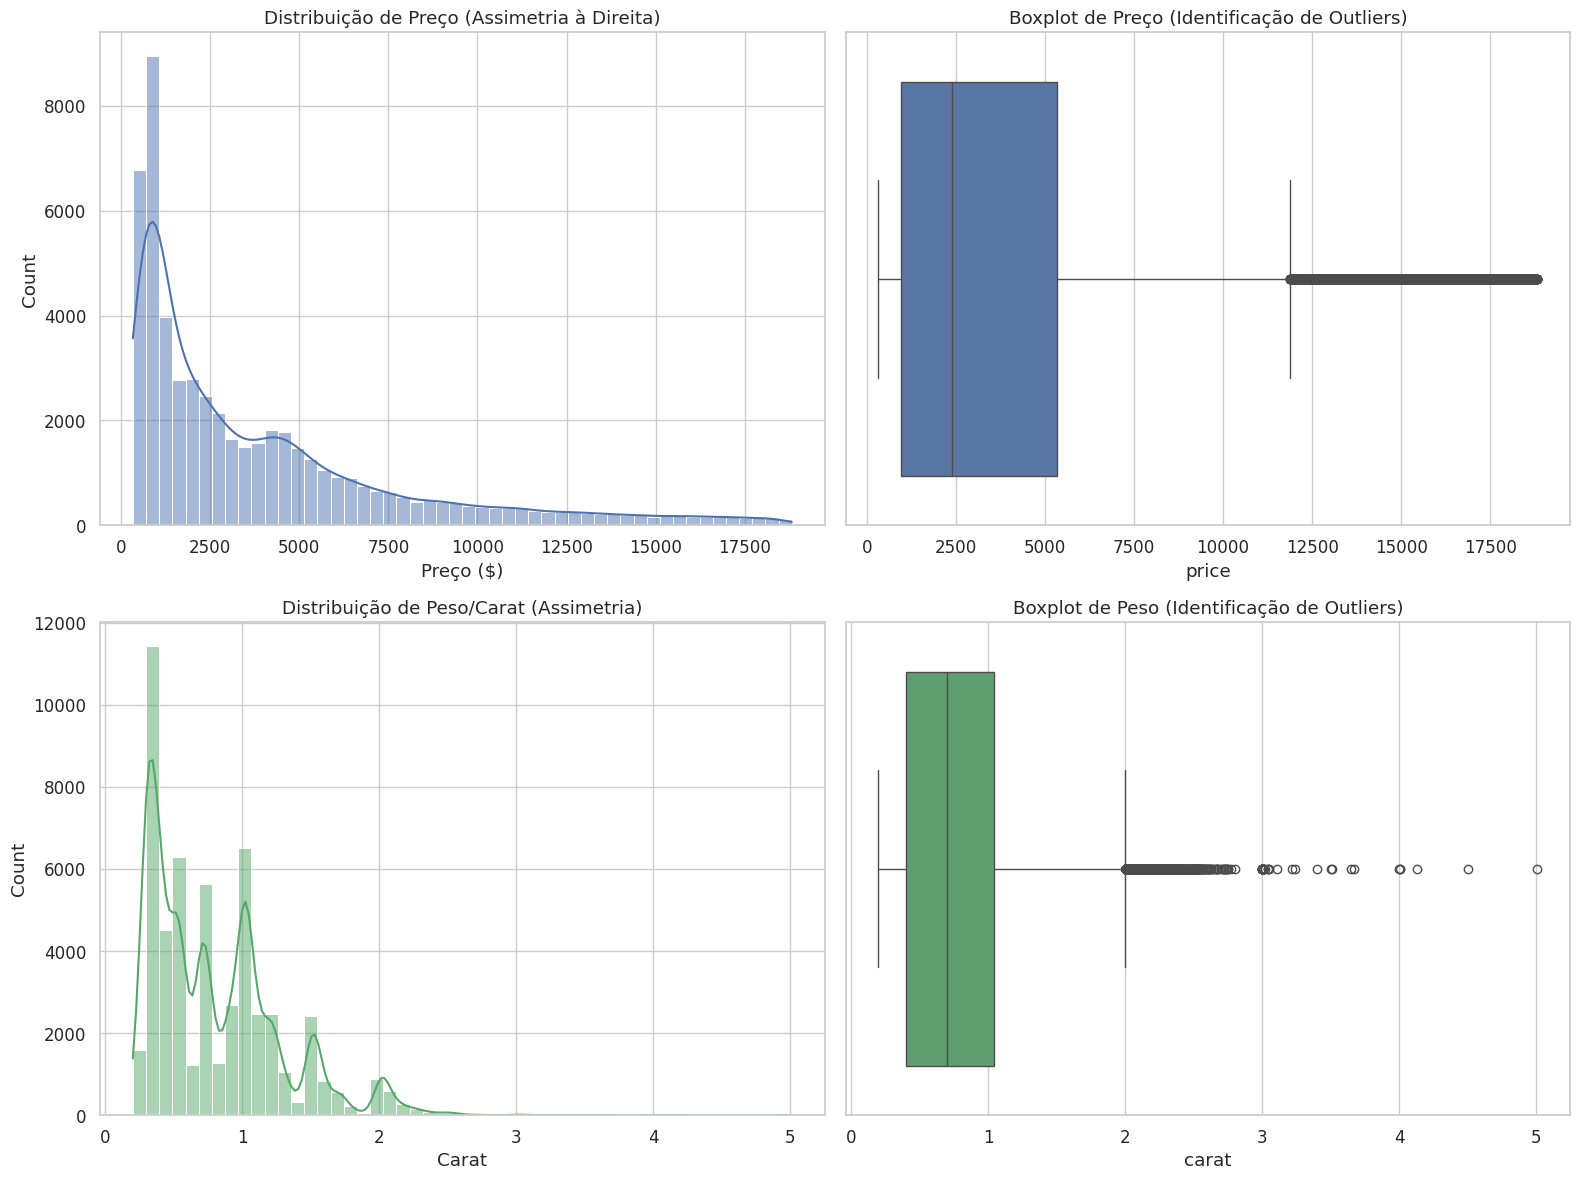

In [27]:
# Criando uma figura com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de Preço
sns.histplot(df['price'], bins=50, kde=True, ax=axes[0, 0], color='#4c72b0')
axes[0, 0].set_title('Distribuição de Preço (Assimetria à Direita)')
axes[0, 0].set_xlabel('Preço ($)')

# Boxplot de Preço
sns.boxplot(x=df['price'], ax=axes[0, 1], color='#4c72b0')
axes[0, 1].set_title('Boxplot de Preço (Identificação de Outliers)')

# Histograma de Carat
sns.histplot(df['carat'], bins=50, kde=True, ax=axes[1, 0], color='#55a868')
axes[1, 0].set_title('Distribuição de Peso/Carat (Assimetria)')
axes[1, 0].set_xlabel('Carat')

# Boxplot de Carat
sns.boxplot(x=df['carat'], ax=axes[1, 1], color='#55a868')
axes[1, 1].set_title('Boxplot de Peso (Identificação de Outliers)')

plt.tight_layout()
plt.show()

**Análise dos Gráficos:**
* **Assimetria:** Ambas as variáveis apresentam forte assimetria à direita (cauda longa). Isso indica que a grande maioria dos diamantes são menores e mais baratos, enquanto diamantes grandes e caros são raros.
* **Outliers:** Os *boxplots* confirmam a presença de diversos *outliers* nos valores superiores. No entanto, neste contexto, esses outliers representam diamantes raros e legítimos, não necessariamente erros de dados.

### **5. Análise de Correlação Linear**
Para responder às perguntas:
* *Q1: O tamanho tem relação com o preço?*
* *Q4: Depth e Table influenciam o preço?*

Utilizamos uma Matriz de Correlação (Heatmap) para visualizar a força das relações lineares entre as variáveis numéricas.

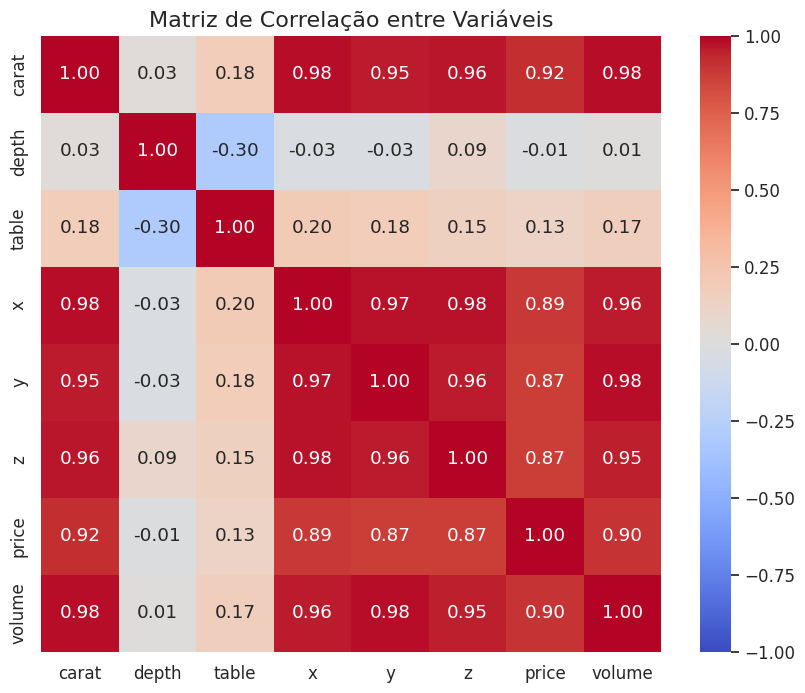

In [28]:
plt.figure(figsize=(10, 8))

# Calculando correlação apenas para colunas numéricas
corr = df.select_dtypes(include=[np.number]).corr()

# Plotando Heatmap
mask = np.triu(np.ones_like(corr, dtype=bool)) # Máscara para ocultar a parte superior (opcional, estética)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.show()

### **5.1 Feature Engineering: A Hipótese do Volume**
Como parte da etapa de **transformação de dados**, levantamos a hipótese de que o **Volume** aproximado do diamante ($x \times y \times z$) pode ser um preditor de preço tão forte quanto o peso (`carat`).

Abaixo, analisamos visualmente sua relação com o preço.

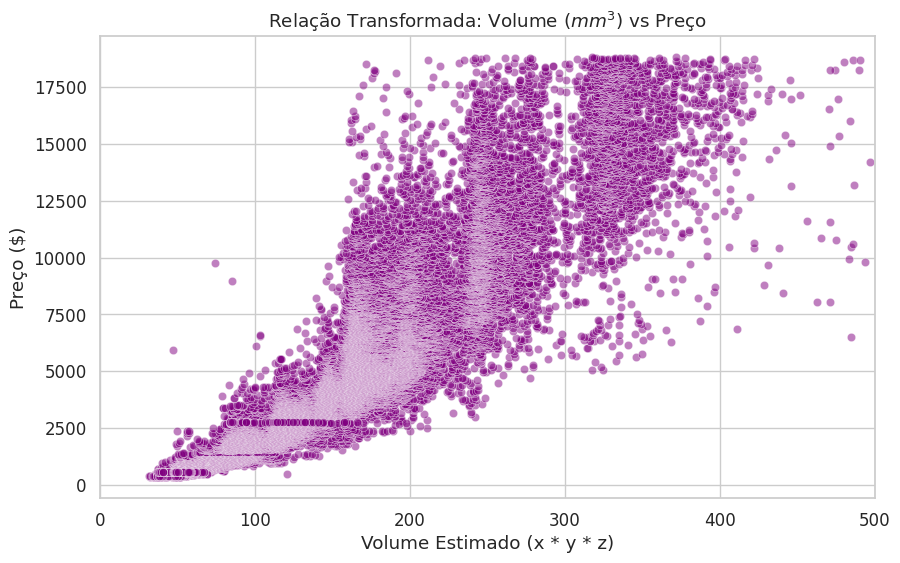

Correlação entre Volume e Preço: 0.9041


In [29]:
# Analisando a nova variável criada (Volume) vs Preço
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='volume', y='price', alpha=0.5, color='purple')
plt.title('Relação Transformada: Volume ($mm^3$) vs Preço')
plt.xlabel('Volume Estimado (x * y * z)')
plt.ylabel('Preço ($)')
# Limitando o eixo X para tirar outliers extremos e ver melhor a massa de dados
plt.xlim(0, 500)
plt.show()

print(f"Correlação entre Volume e Preço: {df['volume'].corr(df['price']):.4f}")

### **Análise e Validação da Hipótese**

**O que o gráfico nos mostra:**
Observamos uma tendência linear extremamente clara: à medida que o volume ($mm^3$) aumenta, o preço sobe proporcionalmente. A dispersão dos pontos é estreita, indicando pouca variação fora dessa regra.

**Interpretação Estatística:**
O cálculo de correlação resultou em um valor acima de **0.90** (confira o output da célula acima).
* Isso confirma nossa hipótese de que a **transformação de dados** (criação da variável volume) foi bem-sucedida.
* Concluímos que, matematicamente, o volume físico é um preditor de preço tão confiável quanto o peso em quilates (`carat`), visto que ambos possuem correlação quase perfeita com o valor monetário.

Isso responde parcialmente à **Questão 1** do projeto: o tamanho (seja peso ou volume) é o fator determinante para o preço.

### **6. Análise de Qualidade: O "Paradoxo" do Corte**

Até agora, provamos que o **tamanho** dita o preço. Mas e a **qualidade** do corte (`cut`)?

Abaixo, investigamos uma curiosidade dos dados: diamantes com corte "Ideal" (a melhor qualidade técnica) possuem, em média, preços **menores** que diamantes de qualidade inferior ("Fair"). Isso faz sentido ou é uma ilusão estatística?

/tmp/ipykernel_50895/1876190494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ax=axes[0], palette='viridis')


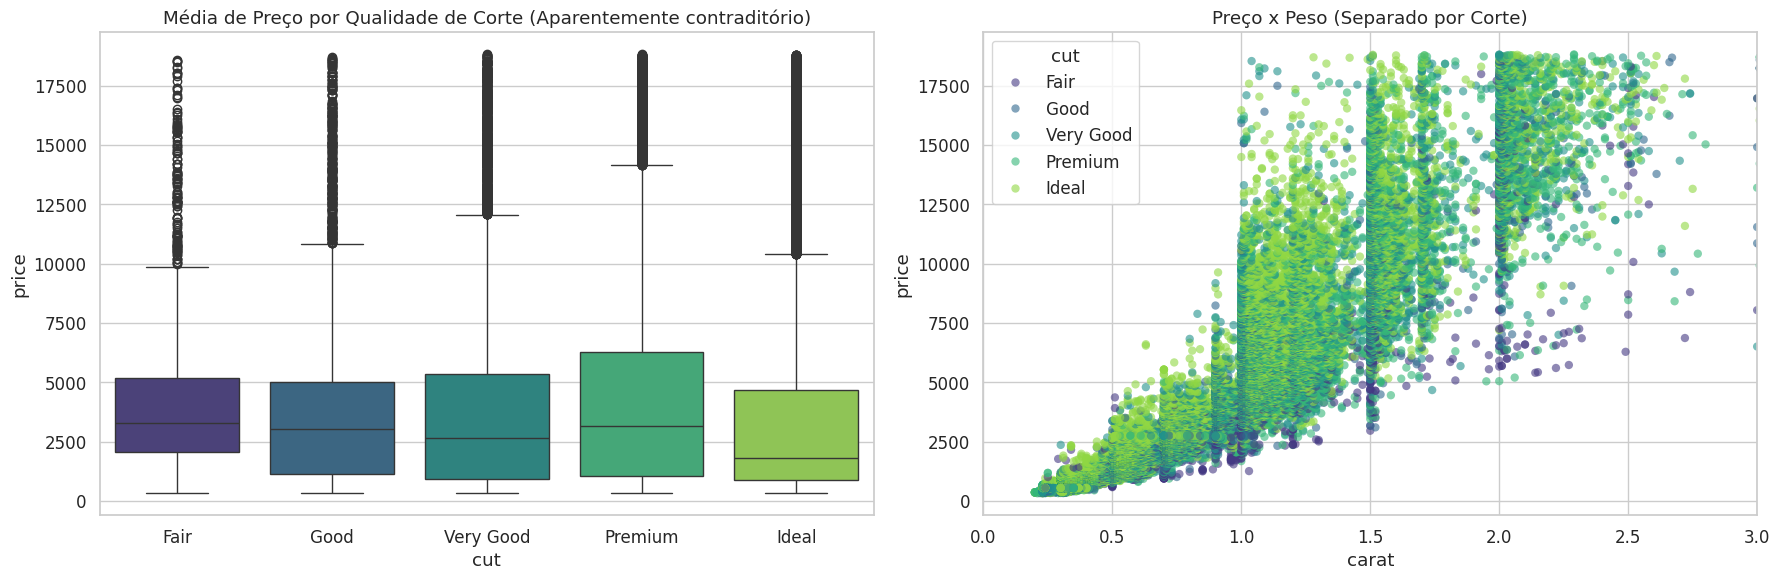

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Boxplot (A Ilusão)
# Mostra que o preço mediano do 'Ideal' é menor que o do 'Fair'
sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ax=axes[0], palette='viridis')
axes[0].set_title('Média de Preço por Qualidade de Corte (Aparentemente contraditório)')

# Gráfico 2: Scatterplot (A Explicação)
# Mostra que, para o MESMO peso, o corte Ideal é sim mais caro (está "acima" dos outros pontos)
sns.scatterplot(data=df, x='carat', y='price', hue='cut', hue_order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], alpha=0.6, linewidth=0, ax=axes[1], palette='viridis')
axes[1].set_title('Preço x Peso (Separado por Corte)')
axes[1].set_xlim(0, 3)

plt.tight_layout()
plt.show()

**Conclusão da Análise de Qualidade:**

Os gráficos acima revelam um fenômeno clássico (similar ao Paradoxo de Simpson):

1.  **O Boxplot (esquerda)** mostra que diamantes "Ideal" são mais baratos na média.
2.  **O Scatterplot (direita)** explica o motivo: os pontos amarelos ("Ideal") estão concentrados no lado esquerdo do gráfico (pesos baixos). Ou seja, **diamantes de corte perfeito tendem a ser menores** para preservar a geometria, e por serem menores, custam menos no total.
3.  Entretanto, ao compararmos verticalmente (mesmo peso), um diamante "Ideal" costuma estar no topo da faixa de preço.

**Resumo:** O peso é o fator macro de preço, mas a qualidade do corte define o prêmio sobre esse preço.

---
### **7. Conclusões Finais**

Com base na exploração dos dados, concluímos as respostas para as perguntas iniciais do projeto:

1.  **Tamanho vs. Preço:** Existe uma correlação positiva extremamente forte (`0.92`) entre o peso (`carat`) e o preço. As dimensões físicas (`x`, `y`, `z`) também acompanham essa tendência, mostrando que o volume do diamante é o principal preditor de custo.
2.  **Outliers e Qualidade:** Identificamos e removemos dados fisicamente impossíveis (dimensões zeradas). Existem muitos outliers legítimos (diamantes muito caros), que são naturais em um mercado de bens de luxo.
3.  **Distribuição:** O mercado é dominado por pedras pequenas. A distribuição de preços é fortemente assimétrica; a média de preços é puxada para cima pelos diamantes de alto valor.
4.  **Influência de Depth/Table:** Contrariando o senso comum, as proporções técnicas `depth` e `table` possuem correlação quase nula com o preço final (`-0.01` e `0.13`, respectivamente). Elas são importantes para a *qualidade* da joia, mas sozinhas não ditam o valor monetário.

**Próximos Passos Sugeridos:**
Para um modelo de Machine Learning futuro, recomenda-se a normalização (escala logarítmica) das variáveis `price` e `carat` para tratar a assimetria detectada.